In [44]:
import pandas as pd
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\박랑희\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

<h3>Import the csv file and print first 5 rows of the data<h3>
<h3>CSV 파일을 가져와 데이터의 처음 5개 행을 출력하십시오.<h3>


In [45]:
data = pd.read_csv('conversation_titles.csv')

In [46]:
print(data.head())

       date              kor_title  \
0  20171204              저는 유양이에요.   
1  20171205        유양 씨는 중국 사람이에요?   
2  20171206           저는 학생이 아니에요.   
3  20171207          저 사람은 흐엉 씨예요.   
4  20171208  다니엘 씨는 스티브 씨의 남동생이에요.   

                                    eng_title              grammar  \
0                                I'm Yooyang.       N은/는¹ N이에요/예요.   
1               Ms. Yooyang, are you Chinese?        N은/는 N이에요/예요?   
2                          I'm not a student.     N은/는 N이/가¹ 아니에요.   
3                   That person is Ms. Huong.  이/그/저 N은/는 N이에요/예요.   
4  Mr. Daniel is Mr. Steve's younger brother.     N은/는 N의 N이에요/예요.   

                                        grammar_desc  
0  N is the noun. '은/는' is used with a noun to de...  
1    It is the interrogative form of 'N은/는 N이에요/예요'.  
2  It is the negation of 'N은/는 N이에요/예요'. When the...  
3  이' is used in front of a noun to refer to some...  
4  의' is the particle used to make possessive for...  


<h5>1. Tokenize English sentences(column with English translations ['eng_title']) using NLTK word_tokenize
   
   NLTK의 word_tokenize를 사용하여 영어 문장(영어 번역이 있는 열 ['eng_title'])을 토큰화하십시오. <h5>
    

In [47]:
from nltk.tokenize import word_tokenize

for index, row in data.iterrows():
   english_sentence = row['eng_title']
   tokens = word_tokenize(english_sentence)
   print(f"English Tokens: {tokens}")

English Tokens: ['I', "'m", 'Yooyang', '.']
English Tokens: ['Ms.', 'Yooyang', ',', 'are', 'you', 'Chinese', '?']
English Tokens: ['I', "'m", 'not', 'a', 'student', '.']
English Tokens: ['That', 'person', 'is', 'Ms.', 'Huong', '.']
English Tokens: ['Mr.', 'Daniel', 'is', 'Mr.', 'Steve', "'s", 'younger', 'brother', '.']
English Tokens: ['Huong', 'is', 'an', 'office', 'worker', '.']
English Tokens: ['What', 'is', 'the', 'name', 'of', 'your', 'apartment', '?']
English Tokens: ['The', 'fitness', 'club', 'is', 'very', 'large', '.']
English Tokens: ['My', 'house', 'is', 'small', '.']
English Tokens: ['There', 'is', 'a', 'window', 'in', 'the', 'room', '.']
English Tokens: ['Is', 'there', 'a', 'pet', 'in', 'your', 'house', '?']
English Tokens: ['There', 'is', 'no', 'chair', 'on', 'the', 'veranda', '.']
English Tokens: ['Where', 'is', 'your', 'company', '?']
English Tokens: ['The', 'elevator', 'is', 'over', 'there', '.']
English Tokens: ['The', 'lounges', 'are', 'on', 'the', 'fifth', 'and', 'te

<h5>2. Clean the 'eng_title' column by removing special characters and splitting the text into tokens using RegexpTokenizer and print first five rows of tokenized sentences

'eng_title' 열을 정제하여 특수 문자를 제거하고 RegexpTokenizer를 사용하여 텍스트를 토큰으로 분리하고 토큰화된 문장의 처음 다섯 줄을 출력하십시오<h5>

In [48]:

from nltk.tokenize import RegexpTokenizer

english_sentences = data['eng_title'].dropna().tolist()

tokenizer = RegexpTokenizer("[\w]+")
tokenized_sentences = [tokenizer.tokenize(sentence) for sentence in english_sentences]

for i in range(5):
    print(tokenized_sentences[i])


['I', 'm', 'Yooyang']
['Ms', 'Yooyang', 'are', 'you', 'Chinese']
['I', 'm', 'not', 'a', 'student']
['That', 'person', 'is', 'Ms', 'Huong']
['Mr', 'Daniel', 'is', 'Mr', 'Steve', 's', 'younger', 'brother']


3.Objective: To clean and standardize the text data in the 'eng_title' column for improved analysis and processing.
목표: 향상된 분석 및 처리를 위해 'eng_title' 열의 텍스트 데이터를 정리하고 표준화하는 것입니다.

In order to get clean data without any missing values and remove all non-alphanumeric characters and spaces it is preferrable to use the following steps:

모든 누락된 값 없이 깨끗한 데이터를 얻으려면 비알파벳 및 공백을 모두 제거하는 다음 단계를 사용하는 것이 좋습니다:
1. Remove rows with missing values (NaN) from the original ['eng_title'] column using dropna().

   **dropna()** 를 사용하여 원래 ['eng_title'] 열에서 누락된 값(NaN)을 가진 행을 제거합니다.
2. Remove non-alphanumeric characters and spaces using **replace(r'[^\w\s]', '')**.

   replace(r'[^\w\s]', '')를 사용하여 비알파벳 및 공백을 제거합니다."

In [68]:
cleaned_eng_title = data['eng_title'].dropna()
final_eng_title = cleaned_eng_title.str.replace(r'[^\w\s]', '')
print(final_eng_title)

0                                           I'm Yooyang.
1                          Ms. Yooyang, are you Chinese?
2                                     I'm not a student.
3                              That person is Ms. Huong.
4             Mr. Daniel is Mr. Steve's younger brother.
                             ...                        
844      Shall we eat something while we watch the game?
845                          It's not easy to find time.
846    By any chance, isn't it true that you are inte...
847    I don't feel awkward though it’s been a while ...
848    It's OK for you to pay the membership fee onli...
Name: eng_title, Length: 849, dtype: object


**1.**  Counter를 사용하여 단어 빈도수 가져오기 예: Counter(tokens)

**2.**  워드 클라우드 생성하기

**3.**  matplotlib을 사용하여 워드 클라우드 표시하기

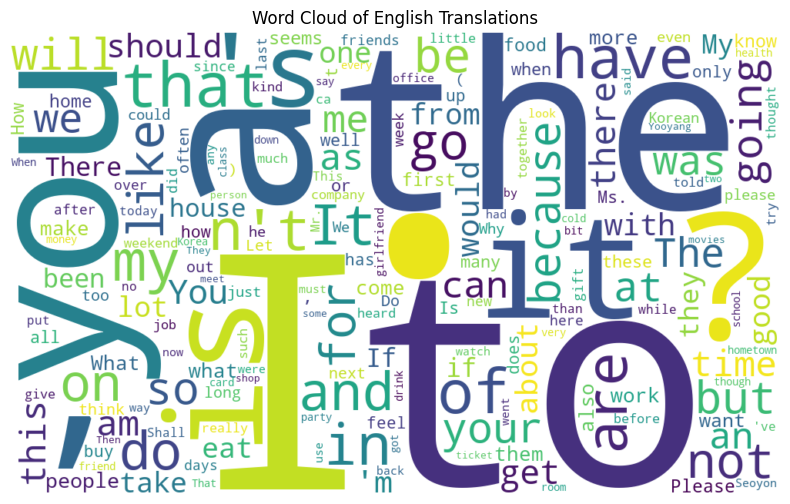

In [72]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt


tokens = word_tokenize(processed_eng_title.str.cat(sep=' '))
word_freq = Counter(tokens)
wordcloud = WordCloud(width=1000, height=600, background_color='white', random_state=0).generate_from_frequencies(word_freq)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') 
plt.title('Word Cloud of English Translations')
plt.show()


**5. 가장 빈번하게 나타나는 상위 10개 단어를 가져와서 그 상위 10개 단어와 그들의 빈도를 표시합니다.**

In [9]:
#code
for word, frequency in top_10_words:
    print(f"{word}: {frequency}")


Top 10 most common words:
I: 392
to: 361
the: 319
a: 285
you: 184
is: 141
it: 139
that: 107
of: 105
have: 97


Provided that we have tokenized data['eng_title'] in th form of the list, we need to stem using PorterStemmer and LancasterStemmer.

**6. 리스트 형태로 토큰화된 데이터['eng_title']가 제공된 상태입니다. 이제 PorterStemmer와 LancasterStemmer를 사용하여 어간 추출을 해야합니다.**

In [10]:
from nltk.stem import PorterStemmer, LancasterStemmer

porter = PorterStemmer()
lancaster = LancasterStemmer()
#code


print("Original Words:", tokens)
print("Porter Stemmer Output:", stemmed_words_porter)
print("Lancaster Stemmer Output:", stemmed_words_lancaster)

Original Words: ['Im', 'Yooyang', 'Ms', 'Yooyang', 'are', 'you', 'Chinese', 'Im', 'not', 'a', 'student', 'That', 'person', 'is', 'Ms', 'Huong', 'Mr', 'Daniel', 'is', 'Mr', 'Steves', 'younger', 'brother', 'Huong', 'is', 'an', 'office', 'worker', 'What', 'is', 'the', 'name', 'of', 'your', 'apartment', 'The', 'fitness', 'club', 'is', 'very', 'large', 'My', 'house', 'is', 'small', 'There', 'is', 'a', 'window', 'in', 'the', 'room', 'Is', 'there', 'a', 'pet', 'in', 'your', 'house', 'There', 'is', 'no', 'chair', 'on', 'the', 'veranda', 'Where', 'is', 'your', 'company', 'The', 'elevator', 'is', 'over', 'there', 'The', 'lounges', 'are', 'on', 'the', 'fifth', 'and', 'tenth', 'floors', 'The', 'copy', 'machine', 'is', 'in', 'front', 'of', 'the', 'window', 'There', 'are', 'twenty', 'desks', 'in', 'the', 'office', 'How', 'many', 'employees', 'are', 'there', 'in', 'the', 'office', 'I', 'have', 'a', 'younger', 'sister', 'I', 'have', 'an', 'elder', 'sister', 'too', 'She', 'is', 'outgoing', 'My', 'girlf

Perform part-of-speech tagging using pos_tag, provided list 'tokens' and display the tagged tokens

**7. pos_tag** 를 사용하여 토큰 리스트의 품사 태깅을 수행하고 태그가 붙은 토큰을 표시하세요.

In [11]:
from nltk import pos_tag

#code

print("Tagged Tokens:")
print(tagged_tokens)


Tagged Tokens:
[('Im', 'NNP'), ('Yooyang', 'NNP'), ('Ms', 'NNP'), ('Yooyang', 'NNP'), ('are', 'VBP'), ('you', 'PRP'), ('Chinese', 'JJ'), ('Im', 'NNP'), ('not', 'RB'), ('a', 'DT'), ('student', 'NN'), ('That', 'IN'), ('person', 'NN'), ('is', 'VBZ'), ('Ms', 'NNP'), ('Huong', 'NNP'), ('Mr', 'NNP'), ('Daniel', 'NNP'), ('is', 'VBZ'), ('Mr', 'NNP'), ('Steves', 'NNP'), ('younger', 'JJR'), ('brother', 'NN'), ('Huong', 'NNP'), ('is', 'VBZ'), ('an', 'DT'), ('office', 'NN'), ('worker', 'NN'), ('What', 'WP'), ('is', 'VBZ'), ('the', 'DT'), ('name', 'NN'), ('of', 'IN'), ('your', 'PRP$'), ('apartment', 'NN'), ('The', 'DT'), ('fitness', 'NN'), ('club', 'NN'), ('is', 'VBZ'), ('very', 'RB'), ('large', 'JJ'), ('My', 'NNP'), ('house', 'NN'), ('is', 'VBZ'), ('small', 'JJ'), ('There', 'EX'), ('is', 'VBZ'), ('a', 'DT'), ('window', 'NN'), ('in', 'IN'), ('the', 'DT'), ('room', 'NN'), ('Is', 'VBZ'), ('there', 'EX'), ('a', 'DT'), ('pet', 'NN'), ('in', 'IN'), ('your', 'PRP$'), ('house', 'NN'), ('There', 'EX'), ('i